## MODEL 1 Neural Network Model on Startup dataset

In [2]:

%pip install -q dmba mord

from pathlib import Path
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

from dmba import classificationSummary, regressionSummary
from mord import LogisticIT

%matplotlib inline
import matplotlib.pyplot as plt




Note: you may need to restart the kernel to use updated packages.


In [3]:
# Create data frame for Startup data set 
startup_df = pd.read_csv(r"C:/Users/Sanjana/Downloads/startup_failure_prediction.csv")

# Display column names of Startup data frame.
print(startup_df.columns)

Index(['Startup_Name', 'Industry', 'Startup_Age', 'Funding_Amount',
       'Number_of_Founders', 'Founder_Experience', 'Employees_Count',
       'Revenue', 'Burn_Rate', 'Market_Size', 'Business_Model',
       'Product_Uniqueness_Score', 'Customer_Retention_Rate',
       'Marketing_Expense', 'Startup_Status'],
      dtype='object')


In [4]:
# Identify predictors and outcome of the regression model.
predictors = ['Funding_Amount', 'Employees_Count', 'Burn_Rate' , 'Customer_Retention_Rate', 'Marketing_Expense']
outcome = 'Revenue'

# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.25). 
X = startup_df[predictors]
y = startup_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.20, random_state=1)

# Display training records of variables train_X 
# (will show the first 5 and the last 5 records).
print("Training Records of Predictors")
print()
print(train_X) # Randomly selected records of predictors

# Display training records of outcome variable train_y 
# (will show the first 5 and the last 5 records).
print()
print("Training Records of Outcome Variable")
print()
print(train_y) # Randomly selected records of outcome variable 

Training Records of Predictors

      Funding_Amount  Employees_Count  Burn_Rate  Customer_Retention_Rate  \
1233        21736702              558     367105                    64.51   
1056        34044809              940     958821                    34.10   
1686        40477862              277     894080                    86.88   
187         26267248              647     900961                    46.88   
3840        40245811              395      24056                    17.44   
...              ...              ...        ...                      ...   
2895        44019051              407     512766                    96.51   
2763        38359631              638     623979                    67.98   
905         15568620              209      88263                    69.54   
3980        19441197                2     307978                    78.97   
235         35792765              206     874054                    55.36   

      Marketing_Expense  
1233             

In [5]:
# Create data partitioning and scale the data using 
# StandardScaler()from scikit-learn libray. Display 
# original and scaled predictors for training partition. 

# Create data partition with training set, 60%(0.6), and 
# validation set 40%(0.4) of the Toyota Corolla data set.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

# Display the first 10 records of Startup training 
# partition's predictors. 
print('Predictors for Training Partition')
print(train_X.head(10))

# Scale input data (predictors) for training  and validation 
# partitions using StandardScaler().
sc_X = StandardScaler()
train_X_sc = sc_X.fit_transform(train_X)
valid_X_sc = sc_X.transform(valid_X)

# Develop a data frame to display scaled predictors for 
# training partition. Round scaled values to 3 decimals.
# Add coloumn titles to data frame.
train_X_sc_df = np.round(pd.DataFrame(train_X_sc), decimals=3)                            
train_X_sc_df.columns=['Funding_Amount', 'Employees_Count', 'Burn_Rate' , 'Customer_Retention_Rate', 'Marketing_Expense']

# Display scaled predictors for training partition.
print()
print('Scaled Predictors for Training Partition')
print(train_X_sc_df.head(10))

Predictors for Training Partition
      Funding_Amount  Employees_Count  Burn_Rate  Customer_Retention_Rate  \
4522        19217792              200     311006                    21.24   
2851         6710803              196     447206                    55.45   
2313        14270641               90     495333                     0.13   
982          1641954              109     772977                    45.76   
1164        14580684               53     850280                    52.55   
1779        33774966               13     708643                    29.75   
2146         2702909              668      13804                    16.58   
4544         2013022              534     192169                    47.13   
2363        29904521              248      62845                    92.86   
1918         6302750              299     237440                    14.09   

      Marketing_Expense  
4522             664299  
2851             201700  
2313             565267  
982           

In [6]:
# Use MLPRegressor() function to train neural network model.
# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (5); 
# (b) default single hidden layer with n nodes; 
# (c) default output layer with one outcome variable (Revenue);
# (d) optimization function solver = 'lbfgs', 
#     which is applied for small data sets for better 
#     performance and fast convergence. For large data sets, 
#     apply default solver = 'adam' optimization function;
# (e) model is fit with scaled predictors and regular outcome
#     in training partition.
startup_reg = MLPRegressor(hidden_layer_sizes=(9), 
                solver='lbfgs', max_iter=1000, random_state=1)
startup_reg.fit(train_X_sc, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Startup data Neural Network Model')
print(startup_reg.intercepts_)

print()
print('Network Weights for Startup data  Neural Network Model')
print(startup_reg.coefs_)

Final Intercepts for Startup data Neural Network Model
[array([ 1550.02019341, -7358.61716752,  2043.98323207, -2359.10405506,
        3399.36072835,  3144.11916437, -4552.92304205, -2890.05980165,
        1935.70365752]), array([15191.64409566])]

Network Weights for Startup data  Neural Network Model
[array([[  313.45621123,  -565.83679325,   992.02167252,   961.30211378,
         -285.6372771 , -1431.40009974,   366.52217915,    47.114201  ,
         -347.02863025],
       [  191.15210274,  2849.61359731,  -196.19510284,   777.95958863,
          709.12957521, -1304.07920812,  -753.29714365,  -309.59654234,
          738.77228759],
       [ -353.58609729,  1666.30177286,   143.10655583,  -870.21382472,
         1039.61731269,  -259.7487237 , -2939.77140762, -1232.78339239,
         -776.56284361],
       [ -813.10900481,   751.15040056,   301.95472259,  1832.75727412,
          338.46278739,  1163.66360786,  -166.97656999, -1474.16433133,
        -1493.61000286],
       [  193.92951

In [7]:
# Make 'Revenue' predictions for validation set using Startup 
# neural network model. 

# Use startup_reg model to predict 'Revenue' outcome
# for validation set.
revenue_pred = np.round(startup_reg.predict(valid_X_sc), decimals=2)

# Create data frame to display prediction results for
# validation set. 
revenue_pred_result = pd.DataFrame({'Actual': valid_y, 
                'Prediction': revenue_pred, 'Residual': valid_y-revenue_pred})

print('Predictions for Startup Revenue for Validation Partition')
print(revenue_pred_result.head(10))

Predictions for Startup Revenue for Validation Partition
        Actual   Prediction     Residual
2764  14491674  48998232.91 -34506558.91
4767  17920460  50400398.11 -32479938.11
3814  20515651  50039920.50 -29524269.50
3499  56738178  53341042.00   3397136.00
2735  55640582  53597148.49   2043433.51
3922     36980  51600834.87 -51563854.87
2701  63788852  43979386.00  19809466.00
1179  47017976  46611664.46    406311.54
932   76180627  52104122.00  24076505.00
792   16115129  52185734.20 -36070605.20


In [8]:
# Neural network model accuracy measures for training and
# validation partitions. 

# Identify and display neural network model accuracy measures 
# for training partition.
print('Accuracy Measures for Training Partition for Neural Network')
regressionSummary(train_y, startup_reg.predict(train_X_sc))

# Identify and display neural network accuracy measures 
# for validation partition.
print()
print('Accuracy Measures for Validation Partition for Neural Network')
regressionSummary(valid_y, startup_reg.predict(valid_X_sc))

Accuracy Measures for Training Partition for Neural Network

Regression statistics

                      Mean Error (ME) : -17570.7707
       Root Mean Squared Error (RMSE) : 28706743.4179
            Mean Absolute Error (MAE) : 24708105.4947
          Mean Percentage Error (MPE) : -1372.1302
Mean Absolute Percentage Error (MAPE) : 1402.5984

Accuracy Measures for Validation Partition for Neural Network

Regression statistics

                      Mean Error (ME) : 357887.5673
       Root Mean Squared Error (RMSE) : 28985499.8556
            Mean Absolute Error (MAE) : 25128433.0098
          Mean Percentage Error (MPE) : -332.7347
Mean Absolute Percentage Error (MAPE) : 364.2876


## Grid search for Startup Prediction data set.

In [13]:
# Identify grid search parameters. 
param_grid_num = {
     'hidden_layer_sizes': list(range(2, 20))  
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer. 
gridSearch = GridSearchCV(MLPRegressor(solver='lbfgs', max_iter=10000, random_state=1), 
                          param_grid_num, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error')
gridSearch.fit(train_X, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)

Best score:-31898140.5081
Best parameter:  {'hidden_layer_sizes': 5}


In [14]:
# For each hidden_layer_size, display grid search results including
# mean and standard deviation of the score. 
display=['param_hidden_layer_sizes', 'mean_test_score', 'std_test_score']
print(pd.DataFrame(gridSearch.cv_results_)[display])

   param_hidden_layer_sizes  mean_test_score  std_test_score
0                         2    -3.321149e+07   632423.684678
1                         3    -3.321323e+07   636395.771255
2                         4    -3.321292e+07   636394.750489
3                         5    -3.189814e+07   644702.373472
4                         6    -3.233723e+07   798183.352190
5                         7    -3.272372e+07   823517.642455
6                         8    -3.244458e+07   909523.929600
7                         9    -3.218247e+07   643708.226409
8                        10    -3.241250e+07   930586.472000
9                        11    -3.218708e+07   825931.979712
10                       12    -3.208001e+07   759966.556925
11                       13    -3.247082e+07   859711.462197
12                       14    -3.209512e+07   830372.814608
13                       15    -3.223381e+07   820422.007442
14                       16    -3.226398e+07   813425.581275
15                      

In [15]:
# Use MLPRegressor() function to train neural network model.
# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (5); 
# (b) single hidden layer with the number of nodes from grid search; 
# (c) default output layer with one outcome variable (Revenue);
# (d) optimization function solver = 'lbfgs', 
#     which is applied for small data sets for better 
#     performance and fast convergence. For large data sets, 
#     apply default solver = 'adam' optimization function;
# (e) model is fit with scaled predictors and regular outcome
#     in training partition.
startup_reg_grid = MLPRegressor(hidden_layer_sizes=(3), 
                solver='lbfgs', max_iter=1000, random_state=1)
startup_reg_grid.fit(train_X_sc, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Startup Neural Network Model')
print(startup_reg_grid.intercepts_)

print()
print('Network Weights for Startup Neural Network Model')
print(startup_reg_grid.coefs_)

Final Intercepts for Startup Neural Network Model
[array([-8602.83240647, -3015.90905339,  6834.05827745]), array([10523.33704828])]

Network Weights for Startup Neural Network Model
[array([[ 3025.08957962,   139.80341406,  -105.79743579],
       [ 3072.74798525,  1335.98811535,   -94.08572805],
       [  257.45559592,  1406.5220719 ,   -86.90896343],
       [-1055.80113438,   -73.15315227,   116.83913299],
       [ 1185.55297202, -2180.11240438,  -101.68447727]]), array([[7925.11961434],
       [2335.65655749],
       [7158.89075339]])]


In [16]:
# Neural network model accuracy measures for training and
# validation partitions for improve model after grid search. 

# Identify and display neural network model accuracy measures 
# for training partition.
print('Accuracy Measures for Training Partition for Neural Network')
regressionSummary(train_y, startup_reg_grid.predict(train_X_sc))

# Identify and display neural network accuracy measures 
# for validation partition.
print()
print('Accuracy Measures for Validation Partition for Neural Network')
regressionSummary(valid_y, startup_reg_grid.predict(valid_X_sc))

Accuracy Measures for Training Partition for Neural Network

Regression statistics

                      Mean Error (ME) : -561.9226
       Root Mean Squared Error (RMSE) : 28809250.1663
            Mean Absolute Error (MAE) : 24853355.3670
          Mean Percentage Error (MPE) : -1372.7932
Mean Absolute Percentage Error (MAPE) : 1403.4481

Accuracy Measures for Validation Partition for Neural Network

Regression statistics

                      Mean Error (ME) : 404920.6725
       Root Mean Squared Error (RMSE) : 28811567.2117
            Mean Absolute Error (MAE) : 24971206.9197
          Mean Percentage Error (MPE) : -325.9240
Mean Absolute Percentage Error (MAPE) : 357.2583


### MODEL 2 Develop regression tree for Startup data set. 

In [17]:
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline   
import matplotlib.pylab as plt

In [25]:
# Load fresh
startup_df = pd.read_csv(r"C:\Users\Sanjana\Downloads\startup_failure_prediction.csv")

# Normalize headers (optional but helps)
startup_df.columns = (
    startup_df.columns.astype(str).str.strip().str.replace(r"\s+", "_", regex=True)
)

# Display column names of Startup data data frame.
print(startup_df.columns)

Index(['Startup_Name', 'Industry', 'Startup_Age', 'Funding_Amount',
       'Number_of_Founders', 'Founder_Experience', 'Employees_Count',
       'Revenue', 'Burn_Rate', 'Market_Size', 'Business_Model',
       'Product_Uniqueness_Score', 'Customer_Retention_Rate',
       'Marketing_Expense', 'Startup_Status'],
      dtype='object')


In [27]:
# Safe drop (no crash if already dropped)
startup_df = startup_df.drop(columns=["Startup_Name"], errors="ignore")

# Only encode columns that still exist & are categorical
requested = ["Industry", "Market_Size", "Business_Model"]
encode_cols = [c for c in requested if c in startup_df.columns and startup_df[c].dtype.name in ("object", "category")]

startup_df = pd.get_dummies(startup_df, columns=encode_cols, drop_first=True)


In [28]:
# Identify predictors and outcome of the regression model.
predictors = ['Startup_Age', 'Funding_Amount', 'Number_of_Founders',
       'Founder_Experience', 'Employees_Count', 'Burn_Rate',
       'Product_Uniqueness_Score', 'Customer_Retention_Rate',
       'Marketing_Expense', 'Startup_Status', 'Industry_E-commerce',
       'Industry_Education', 'Industry_Finance', 'Industry_Healthcare',
       'Industry_Logistics', 'Industry_Tech', 'Market_Size_Medium',
       'Market_Size_Small', 'Business_Model_B2C', 'Business_Model_Hybrid']
outcome = 'Revenue'

# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.40). 
X = startup_df[predictors]
y = startup_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [29]:
# Grid search to find optimized regression tree.

# Start with an initial guess for parameters.
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50],}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeRegressor() initial parameters. 
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best initial paramenters of regression tree. 
print(f'Initial score:{gridSearch.best_score_:.4f}')
print('Initial parameters: ', gridSearch.best_params_)

Initial score:-0.0517
Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 50}


In [30]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(2, 10)), 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 
                   0.004, 0.005], 
    'min_samples_split': list(range(10, 50)), 
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeRegressor() new parameters. 
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of regression tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:-0.0088
Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0, 'min_samples_split': 41}


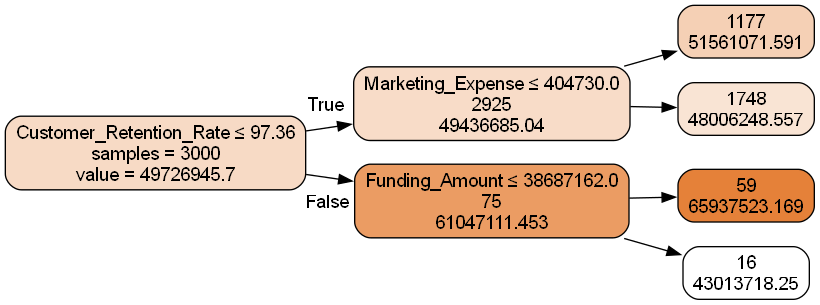

In [31]:
# Create regression tree based on the improved parameters. 
bestRegTree = gridSearch.best_estimator_

# Display regression tree bestRegTree based on the best 
# parameters from grid search.
plotDecisionTree(bestRegTree, feature_names=train_X.columns, rotate=True)

In [32]:
# Indetify and display number of nodes in the regression tree.
tree_nodes = bestRegTree.tree_.node_count
print('Number of nodes:', tree_nodes)

Number of nodes: 7


In [33]:
# Regression tree accuracy measures for training and
# validation partitions. 

# Identify and display regression tree accuracy measures 
# for training partition.
print('Accuracy Measures for Training Partition for Regression Tree')
regressionSummary(train_y, bestRegTree.predict(train_X))

# Identify and display regression tree accuracy measures 
# for validation partition.
print()
print('Accuracy Measures for Validation Partition for Regression Tree')
regressionSummary(valid_y, bestRegTree.predict(valid_X))

Accuracy Measures for Training Partition for Regression Tree

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 28783611.3811
            Mean Absolute Error (MAE) : 24792719.2299
          Mean Percentage Error (MPE) : -1361.1719
Mean Absolute Percentage Error (MAPE) : 1391.7525

Accuracy Measures for Validation Partition for Regression Tree

Regression statistics

                      Mean Error (ME) : 439428.4381
       Root Mean Squared Error (RMSE) : 28776224.2234
            Mean Absolute Error (MAE) : 24951465.6812
          Mean Percentage Error (MPE) : -327.0656
Mean Absolute Percentage Error (MAPE) : 358.4674


## MODEL 3 Full Classification Tree

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline   
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
startup_df = pd.read_csv(r"C:\Users\Sanjana\Downloads\startup_failure_prediction.csv")
startup_df

,Startup_Name,Industry,Startup_Age,Funding_Amount,Number_of_Founders,Founder_Experience,Employees_Count,Revenue,Burn_Rate,Market_Size,Business_Model,Product_Uniqueness_Score,Customer_Retention_Rate,Marketing_Expense,Startup_Status
0,Startup_1,Logistics,8,18328419,2,13,581,97866143,602731,Medium,B2B,2,79.61,987830,1
1,Startup_2,Education,3,39753708,3,16,529,36868744,820698,Large,B2C,3,32.47,599615,1
2,Startup_3,Healthcare,14,18073294,1,28,82,3478737,992205,Small,B2C,1,9.88,780730,1
3,Startup_4,E-commerce,5,19435653,4,14,234,80716899,536747,Medium,B2C,9,23.20,188588,1
4,Startup_5,Finance,14,4205797,4,17,960,53347246,555199,Medium,Hybrid,3,73.52,310892,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Startup_4996,Education,9,39609909,4,13,324,16090631,971733,Small,B2B,7,21.56,568646,1
4996,Startup_4997,AI/ML,7,32167694,3,17,673,72563900,148322,Large,B2C,5,89.58,466261,1
4997,Startup_4998,Logistics,13,38902583,4,14,253,66629971,487704,Medium,B2C,6,17.21,468514,1
4998,Startup_4999,Education,2,33410138,4,16,417,69293233,723237,Medium,B2B,9,39.35,134880,1


In [36]:
#Drop unnecessary columns
startup_df = startup_df.drop(columns=['Startup_Name', 'Industry', 'Business_Model'])

# Manual mapping of Market_Size
market_size_map = {
    'Small': 0,
    'Medium': 1,
    'Large': 2
}

# Applying mapping
startup_df['Market_Size_Label'] = startup_df['Market_Size'].map(market_size_map)

#Dropping the original Market_Size (keep the encoded version)
startup_df = startup_df.drop(columns=['Market_Size'])

In [37]:
startup_df

,Startup_Age,Funding_Amount,Number_of_Founders,Founder_Experience,Employees_Count,Revenue,Burn_Rate,Product_Uniqueness_Score,Customer_Retention_Rate,Marketing_Expense,Startup_Status,Market_Size_Label
0,8,18328419,2,13,581,97866143,602731,2,79.61,987830,1,1
1,3,39753708,3,16,529,36868744,820698,3,32.47,599615,1,2
2,14,18073294,1,28,82,3478737,992205,1,9.88,780730,1,0
3,5,19435653,4,14,234,80716899,536747,9,23.20,188588,1,1
4,14,4205797,4,17,960,53347246,555199,3,73.52,310892,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9,39609909,4,13,324,16090631,971733,7,21.56,568646,1,0
4996,7,32167694,3,17,673,72563900,148322,5,89.58,466261,1,2
4997,13,38902583,4,14,253,66629971,487704,6,17.21,468514,1,1
4998,2,33410138,4,16,417,69293233,723237,9,39.35,134880,1,1


In [38]:
#Define predictors and target
X = startup_df.drop(columns=['Market_Size_Label'])
y = startup_df['Market_Size_Label']
startup_df

,Startup_Age,Funding_Amount,Number_of_Founders,Founder_Experience,Employees_Count,Revenue,Burn_Rate,Product_Uniqueness_Score,Customer_Retention_Rate,Marketing_Expense,Startup_Status,Market_Size_Label
0,8,18328419,2,13,581,97866143,602731,2,79.61,987830,1,1
1,3,39753708,3,16,529,36868744,820698,3,32.47,599615,1,2
2,14,18073294,1,28,82,3478737,992205,1,9.88,780730,1,0
3,5,19435653,4,14,234,80716899,536747,9,23.20,188588,1,1
4,14,4205797,4,17,960,53347246,555199,3,73.52,310892,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9,39609909,4,13,324,16090631,971733,7,21.56,568646,1,0
4996,7,32167694,3,17,673,72563900,148322,5,89.58,466261,1,2
4997,13,38902583,4,14,253,66629971,487704,6,17.21,468514,1,1
4998,2,33410138,4,16,417,69293233,723237,9,39.35,134880,1,1


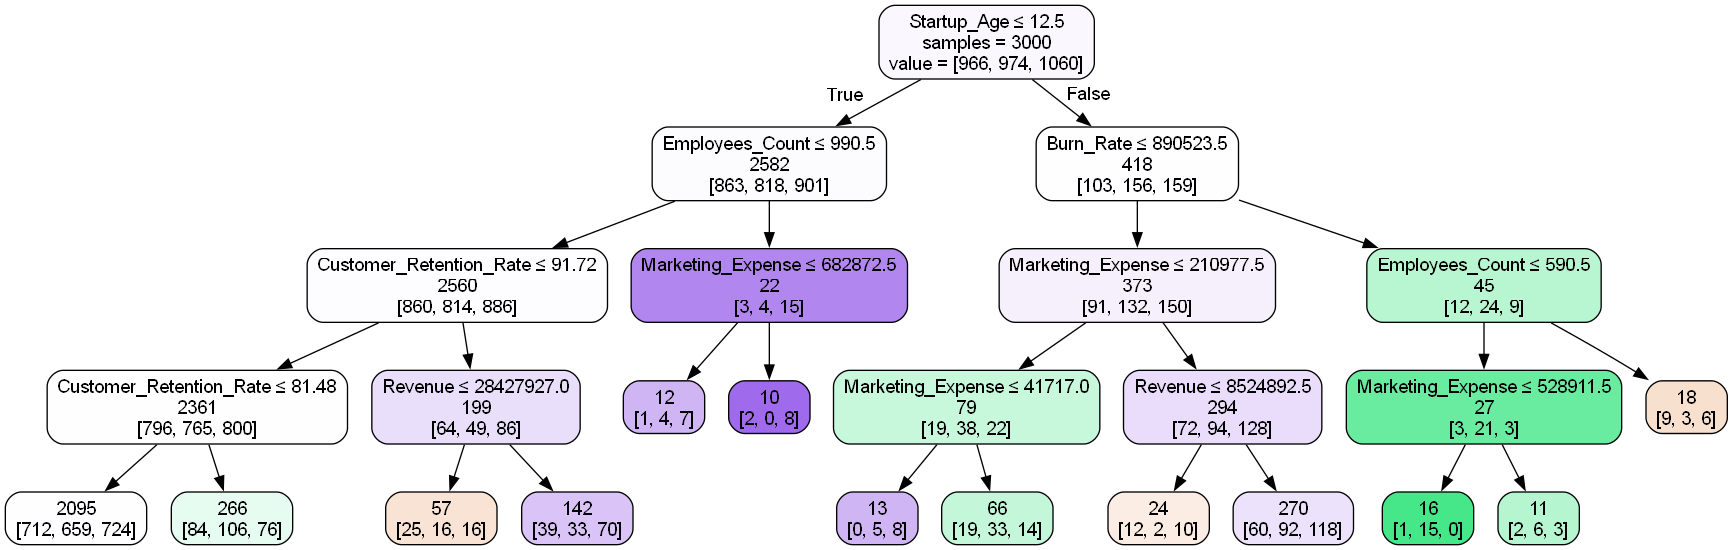

In [39]:
# Split into training and validation sets
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

#Grow full classification tree
fullClassTree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=1)
fullClassTree.fit(train_X, train_y)

# Visualize the full tree
plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [40]:
# Indetify and display number of nodes in the tree.
tree_nodes = fullClassTree.tree_.node_count
print('Number of nodes:', tree_nodes)

Number of nodes: 25


In [41]:
# Confusion matrices for full classification tree. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, fullClassTree.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, fullClassTree.predict(valid_X))

# Accuracy =(1790 + 168)/2000 = 0.9790 = 97.90%
# Misclissification = (25+17)/2000 = 0.021 = 2.1% = 1- Accuracy = 1-0.979 = 0.021 = 2.1%

Training Partition
Confusion Matrix (Accuracy 0.3803)

       Prediction
Actual   0   1   2
     0  46 106 814
     1  21 160 793
     2  32  93 935

Validation Partition
Confusion Matrix (Accuracy 0.3425)

       Prediction
Actual   0   1   2
     0  25  75 561
     1  19  72 561
     2  32  67 588


## Grid search for Startup classification tree.

In [42]:
# Start with initial guess for parameters.
param_grid = {
    'max_depth': [10, 20, 30, 40],  
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
    'min_samples_split': [20, 40, 60, 80, 100],
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() initial parameters. cv=5 means that
# 5-fold cross-validation is used in this case, and n_jobs=-1 
# means that the availalbe computer memory (CPU) will be 
# used to make calculations faster. 
gridSearch_init = GridSearchCV(DecisionTreeClassifier(), 
                   param_grid, cv=5, n_jobs=-1)
gridSearch_init.fit(train_X, train_y)

# Display best initial paramenters of classification tree. 
print(f'Initial score:{gridSearch_init.best_score_:.4f}')
print('Initial parameters: ', gridSearch_init.best_params_)

Initial score:0.3533
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 20}


In [43]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(2, 20)),  
    'min_impurity_decrease': [0, 0.0005, 0.001], 
    'min_samples_split': list(range(10, 25)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.3503
Improved parameters:  {'max_depth': 3, 'min_impurity_decrease': 0, 'min_samples_split': 22}


Best Classification Tree with Grid Search


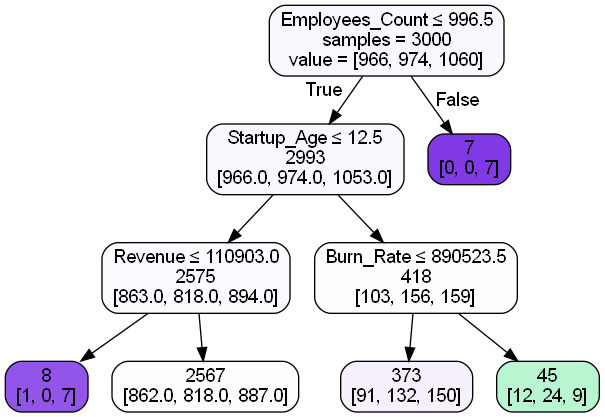

In [140]:
# Create classification tree based on the improved parameters.
bestClassTree = gridSearch.best_estimator_

# Display classification tree based on improved parameters.
print('Best Classification Tree with Grid Search')
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [142]:
# Identify and display number of nodes in the tree
# based on grid search.
tree_nodes_grid = bestClassTree.tree_.node_count
print('Number of nodes:', tree_nodes_grid)

Number of nodes: 9


In [144]:
# Confusion matrices for grid search classification tree. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, bestClassTree.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.3583)

       Prediction
Actual    0    1    2
     0    0   12  954
     1    0   24  950
     2    0    9 1051

Validation Partition
Confusion Matrix (Accuracy 0.3440)

       Prediction
Actual   0   1   2
     0   0  12 649
     1   0   8 644
     2   0   7 680


## Five-fold cross-validation for Startup data set classification tree.

In [131]:
# Five-fold cross-validation of the full decision tree classifier.
# Develop full classification tree.  
treeClassifier = DecisionTreeClassifier(random_state=1)

# Use cross_val_score() function to identify performance 
# accuracy for 5 folds (cv=5) of cross-validation partitioning.
scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)

# Display performance accuracy scores for each fold partition.
# Use three decimals (.3f) for each accuracy score using the 
# acc (accumulator) parameter. 
print('Performance Accuracy of 5-Fold Cross-Validation')
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])

# Indetify and display two standard deviation confidence interval for 
# population mean scores.
print()
print('Two Standard Deviation (95%) Confidence Interval for Mean Accuracy')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Performance Accuracy of 5-Fold Cross-Validation
Accuracy scores of each fold:  ['0.368', '0.323', '0.360', '0.337', '0.312']

Two Standard Deviation (95%) Confidence Interval for Mean Accuracy
Accuracy: 0.340 (+/- 0.043)


## Apply Boosted Tree algorithm on Startup data 

In [146]:
# Apply GradientBoostingClassifier() function to develop a combined
# boosted tree.  
boost = GradientBoostingClassifier(n_estimators=500, random_state=1)
boost.fit(train_X, train_y)

GradientBoostingClassifier(n_estimators=500, random_state=1)
# Confusion matrices for Boosted Tree classification. 

# Identify  and show confusion matrix for training partition. 
print('Training Partition for Boosted Tree')
classificationSummary(train_y, boost.predict(train_X))

# Identify  and show confusion matrix for validation partition. 
print()
print('Validation Partition for Boosted Tree')
classificationSummary(valid_y, boost.predict(valid_X))


Training Partition for Boosted Tree
Confusion Matrix (Accuracy 0.9243)

       Prediction
Actual    0    1    2
     0  875   37   54
     1   35  889   50
     2   26   25 1009

Validation Partition for Boosted Tree
Confusion Matrix (Accuracy 0.3570)

       Prediction
Actual   0   1   2
     0 226 212 223
     1 189 219 244
     2 210 208 269


### Apply Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


# Apply RandomForestClassifier() function to develop a combined
# (ensemple) classification tree using Random Forest algorithm.
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,                 # limit tree depth
    min_samples_leaf=10,         # prevent overfitting on noise
    random_state=1
)
rf_model.fit(train_X, train_y)

# Display number of nodes in Random Forest trees.
n_nodes = rf_model.estimators_[0].tree_.node_count
print('Number of Nodes in Tree in Random Forest:', n_nodes)

Number of Nodes in Tree in Random Forest: 61


In [159]:
# Confusion matrices for Random Forest classification. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition for Random Forests')
classificationSummary(train_y, rf_model.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Random Forests')
classificationSummary(valid_y, rf_model.predict(valid_X))

Training Partition for Random Forests
Confusion Matrix (Accuracy 0.5853)

       Prediction
Actual   0   1   2
     0 402  90 474
     1  95 417 462
     2  59  64 937

Validation Partition for Random Forests
Confusion Matrix (Accuracy 0.3455)

       Prediction
Actual   0   1   2
     0 123 117 421
     1 112 114 426
     2 108 125 454


In [161]:
# For Random Forest, identify variable importance scores. 
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

# Develop data frame for variable importance. The table data is sorted
# in descending order (ascending=False).
score_df = pd.DataFrame({'Feature': train_X.columns, 'Importance': importances, 'Std': std})
score_df = score_df.sort_values('Importance', ascending=False)

# Display variable importance for Random Forest results. 
print('Variable Importance Scores for Random Forest')
print(score_df)

Variable Importance Scores for Random Forest
                     Feature  Importance       Std
4            Employees_Count    0.140161  0.078573
1             Funding_Amount    0.128729  0.071165
8    Customer_Retention_Rate    0.126584  0.080713
9          Marketing_Expense    0.124292  0.079469
5                    Revenue    0.121032  0.068698
6                  Burn_Rate    0.118136  0.077626
0                Startup_Age    0.086239  0.059138
3         Founder_Experience    0.080517  0.053473
7   Product_Uniqueness_Score    0.043004  0.041318
2         Number_of_Founders    0.031306  0.032855
10            Startup_Status    0.000000  0.000000


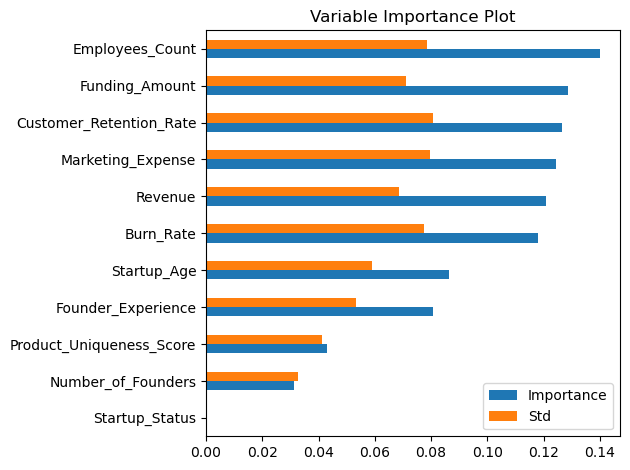

In [163]:
# Develop variable importance plot.
score_df = score_df.sort_values('Importance')
ax = score_df.plot(kind='barh', x='Feature')
ax.set_ylabel('')
plt.title('Variable Importance Plot')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#### Predict Revenue using Gradient Boosting Regressor

In [44]:
# Re-import required libraries after code reset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
startup_df = pd.read_csv(r"C:\Users\Sanjana\Downloads\startup_failure_prediction.csv")
startup_df

# Drop identifier columns
startup_df = startup_df.drop(columns=['Startup_Name'])

# One-hot encode categorical variables
startup_df = pd.get_dummies(startup_df, columns=['Industry', 'Business_Model', 'Market_Size'], drop_first=True)

# Define predictors and target
X = startup_df.drop(columns=['Revenue'])
y = startup_df['Revenue']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

# Train Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=1)
gbr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = gbr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

r2, rmse


(-0.05375492895007805, 29425625.955208257)

In [45]:
## Calculate Accuracy Measures

In [46]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Basic metrics
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]  # number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Display results
print("Accuracy Measures for Revenue Prediction (Gradient Boosting):\n")
print(f"R²:          {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")
print(f"RMSE:        {rmse:,.2f}")
print(f"MAE:         {mae:,.2f}")
print(f"MAPE:        {mape:.2f}%")


Accuracy Measures for Revenue Prediction (Gradient Boosting):

R²:          -0.0538
Adjusted R²: -0.0680
RMSE:        29,425,625.96
MAE:         25,393,527.62
MAPE:        401.17%


# Multiple Linear Regression.

In [47]:
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import statsmodels.formula.api as sm

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

import matplotlib.pylab as plt
%matplotlib inline

In [48]:
# Create data frame from the original data set.  
startup_df = pd.read_csv(r"C:\Users\Sanjana\Downloads\startup_failure_prediction.csv")
# Determine dimensions of dataframe. 
startup_df.shape # It has 5000 rows and 15 columns.

(5000, 15)

In [49]:
# Display the first 5 records of the original data set.
startup_df.head()

,Startup_Name,Industry,Startup_Age,Funding_Amount,Number_of_Founders,Founder_Experience,Employees_Count,Revenue,Burn_Rate,Market_Size,Business_Model,Product_Uniqueness_Score,Customer_Retention_Rate,Marketing_Expense,Startup_Status
0,Startup_1,Logistics,8,18328419,2,13,581,97866143,602731,Medium,B2B,2,79.61,987830,1
1,Startup_2,Education,3,39753708,3,16,529,36868744,820698,Large,B2C,3,32.47,599615,1
2,Startup_3,Healthcare,14,18073294,1,28,82,3478737,992205,Small,B2C,1,9.88,780730,1
3,Startup_4,E-commerce,5,19435653,4,14,234,80716899,536747,Medium,B2C,9,23.20,188588,1
4,Startup_5,Finance,14,4205797,4,17,960,53347246,555199,Medium,Hybrid,3,73.52,310892,1


In [50]:
# Display the column names.
startup_df.columns

Index(['Startup_Name', 'Industry', 'Startup_Age', 'Funding_Amount',
       'Number_of_Founders', 'Founder_Experience', 'Employees_Count',
       'Revenue', 'Burn_Rate', 'Market_Size', 'Business_Model',
       'Product_Uniqueness_Score', 'Customer_Retention_Rate',
       'Marketing_Expense', 'Startup_Status'],
      dtype='object')

In [51]:
# Display column data types in the dataframe for regression analysis.df = df.drop(columns=['Startup_Name'])

startup_df.dtypes

Startup_Name                 object
Industry                     object
Startup_Age                   int64
Funding_Amount                int64
Number_of_Founders            int64
Founder_Experience            int64
Employees_Count               int64
Revenue                       int64
Burn_Rate                     int64
Market_Size                  object
Business_Model               object
Product_Uniqueness_Score      int64
Customer_Retention_Rate     float64
Marketing_Expense             int64
Startup_Status                int64
dtype: object

In [52]:
startup_df = startup_df.drop(columns=['Startup_Name'])
startup_df = pd.get_dummies(startup_df, columns=['Industry', 'Market_Size', 'Business_Model'], drop_first=True)

In [53]:
np.round(startup_df.describe(),2)

,Startup_Age,Funding_Amount,Number_of_Founders,Founder_Experience,Employees_Count,Revenue,Burn_Rate,Product_Uniqueness_Score,Customer_Retention_Rate,Marketing_Expense,Startup_Status
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.0
mean,6.99,24973414.13,2.50,14.74,496.73,49920146.57,500959.92,4.96,50.22,507304.29,1.0
std,4.35,14457699.73,1.12,8.67,292.72,28789635.95,287379.95,2.58,28.56,289234.19,0.0
min,0.00,11209.00,1.00,0.00,1.00,3213.00,5016.00,1.00,0.04,5253.00,1.0
25%,3.00,12500121.50,2.00,7.00,236.00,24583074.75,249027.50,3.00,25.64,259590.50,1.0
50%,7.00,24961046.00,2.00,15.00,498.50,50266757.00,503405.50,5.00,50.07,503504.50,1.0
75%,11.00,37475316.50,4.00,22.00,747.00,74781643.75,751950.00,7.00,74.70,760906.00,1.0
max,14.00,49993132.00,4.00,29.00,999.00,99996630.00,999554.00,9.00,99.98,999866.00,1.0


In [54]:
startup_df = startup_df.drop_duplicates()

In [55]:
startup_df

,Startup_Age,Funding_Amount,Number_of_Founders,Founder_Experience,Employees_Count,Revenue,Burn_Rate,Product_Uniqueness_Score,Customer_Retention_Rate,Marketing_Expense,...,Industry_E-commerce,Industry_Education,Industry_Finance,Industry_Healthcare,Industry_Logistics,Industry_Tech,Market_Size_Medium,Market_Size_Small,Business_Model_B2C,Business_Model_Hybrid
0,8,18328419,2,13,581,97866143,602731,2,79.61,987830,...,False,False,False,False,True,False,True,False,False,False
1,3,39753708,3,16,529,36868744,820698,3,32.47,599615,...,False,True,False,False,False,False,False,False,True,False
2,14,18073294,1,28,82,3478737,992205,1,9.88,780730,...,False,False,False,True,False,False,False,True,True,False
3,5,19435653,4,14,234,80716899,536747,9,23.20,188588,...,True,False,False,False,False,False,True,False,True,False
4,14,4205797,4,17,960,53347246,555199,3,73.52,310892,...,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9,39609909,4,13,324,16090631,971733,7,21.56,568646,...,False,True,False,False,False,False,False,True,False,False
4996,7,32167694,3,17,673,72563900,148322,5,89.58,466261,...,False,False,False,False,False,False,False,False,True,False
4997,13,38902583,4,14,253,66629971,487704,6,17.21,468514,...,False,False,False,False,True,False,True,False,True,False
4998,2,33410138,4,16,417,69293233,723237,9,39.35,134880,...,False,True,False,False,False,False,True,False,False,False


In [56]:
startup_df.columns

Index(['Startup_Age', 'Funding_Amount', 'Number_of_Founders',
       'Founder_Experience', 'Employees_Count', 'Revenue', 'Burn_Rate',
       'Product_Uniqueness_Score', 'Customer_Retention_Rate',
       'Marketing_Expense', 'Startup_Status', 'Industry_E-commerce',
       'Industry_Education', 'Industry_Finance', 'Industry_Healthcare',
       'Industry_Logistics', 'Industry_Tech', 'Market_Size_Medium',
       'Market_Size_Small', 'Business_Model_B2C', 'Business_Model_Hybrid'],
      dtype='object')

## Develop multiple linear regression model and make predictions. 

In [57]:
# Identify predictors and outcome of the regression model.
predictors = ['Startup_Age', 'Funding_Amount', 'Number_of_Founders',
       'Founder_Experience', 'Employees_Count', 'Burn_Rate',
       'Product_Uniqueness_Score', 'Customer_Retention_Rate',
       'Marketing_Expense', 'Startup_Status', 'Industry_E-commerce',
       'Industry_Education', 'Industry_Finance', 'Industry_Healthcare',
       'Industry_Logistics', 'Industry_Tech', 'Market_Size_Medium',
       'Market_Size_Small', 'Business_Model_B2C', 'Business_Model_Hybrid']
outcome = 'Revenue'

# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.40). 
X = startup_df[predictors]
y = startup_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Display training records of variables train_X 
# (will show the first 5 and the last 5 records).
print("Training Records of Predictors")
print()
print(train_X) # Randomly selected records of predictors, 600 records.

# Display training records of outcome variable train_y 
# (will show the first 5 and the last 5 records).
print()
print("Training Records of Outcome Variable")
print()
print(train_y) # Randomly selected records of outcome variable, 600 records. 

Training Records of Predictors

      Startup_Age  Funding_Amount  Number_of_Founders  Founder_Experience  \
4522           14        19217792                   2                   1   
2851           12         6710803                   1                  19   
2313            5        14270641                   2                   6   
982             9         1641954                   4                  25   
1164            8        14580684                   2                  23   
...           ...             ...                 ...                 ...   
2895            8        44019051                   1                   3   
2763            3        38359631                   2                  23   
905             9        15568620                   2                  19   
3980           12        19441197                   1                  11   
235             0        35792765                   3                  10   

      Employees_Count  Burn_Rate  Product_U

In [58]:
# Create multiple linear regression model using X and y
# and LinearRegression() function from sklearn (skikit-learn) 
# library.
startup_lm = LinearRegression()
startup_lm.fit(train_X, train_y)

# Display intercept and regression coefficients. Round
# them to 2 decimals.
print('Regression Model for Startup Training Set')
print()
print('Intercept: ', np.round(startup_lm.intercept_, 2)) # coefficient Bo
print(pd.DataFrame({'Predictor': X.columns, 'Coefficient': np.round(startup_lm.coef_, 2)}))

Regression Model for Startup Training Set

Intercept:  51809155.44
                   Predictor  Coefficient
0                Startup_Age    -84190.90
1             Funding_Amount        -0.02
2         Number_of_Founders     14975.33
3         Founder_Experience     52583.31
4            Employees_Count       658.76
5                  Burn_Rate         0.03
6   Product_Uniqueness_Score    -41086.36
7    Customer_Retention_Rate     20638.26
8          Marketing_Expense        -3.77
9             Startup_Status         0.00
10       Industry_E-commerce  -2012788.17
11        Industry_Education  -1357833.45
12          Industry_Finance  -1521195.17
13       Industry_Healthcare    517230.61
14        Industry_Logistics  -1796443.16
15             Industry_Tech   -894675.32
16        Market_Size_Medium  -1734616.08
17         Market_Size_Small  -1191207.12
18        Business_Model_B2C   1014761.01
19     Business_Model_Hybrid   1735743.39


In [59]:
# Use predict() to score (make) predictions for validation set.
startup_lm_pred = startup_lm.predict(valid_X)

# Develop and display data frame with actual values of Price,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 
print('Actual, Prediction, and Residual Prices for Validation Set')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': startup_lm_pred, 
                       'Residual': valid_y - startup_lm_pred}), 2)
print(result.head(10))

Actual, Prediction, and Residual Prices for Validation Set
        Actual    Predicted     Residual
2764  14491674  50337764.71 -35846090.71
4767  17920460  50710265.89 -32789805.89
3814  20515651  51621688.22 -31106037.22
3499  56738178  54276858.72   2461319.28
2735  55640582  48612053.60   7028528.40
3922     36980  49477656.35 -49440676.35
2701  63788852  44778204.05  19010647.95
1179  47017976  49814608.60  -2796632.60
932   76180627  49907355.08  26273271.92
792   16115129  50735328.62 -34620199.62


## Identify and compare performance measures for training and validation set.

In [60]:
# Use predict() function to make predictions for
# training set.
pred_y = startup_lm.predict(train_X)

# Create prediction performance measures for training set.
r2 = round(r2_score(train_y, pred_y),3)
adj_r2 = round(adjusted_r2_score(train_y, pred_y, startup_lm),3)
aic = round(AIC_score(train_y, pred_y, startup_lm),2)
bic = round(BIC_score(train_y, pred_y, startup_lm),2)

# Display prediction performance measures for training set.
print('Prediction Performance Measures for Training Set')
print('r2 : ', r2)
print('Adjusted r2 : ', adj_r2)
print('AIC : ', aic)
print('BIC : ', bic)
print() 

# Create prediction performance measures for validation set.
r2 = round(r2_score(valid_y, startup_lm_pred),3)
adj_r2 = round(adjusted_r2_score(valid_y, startup_lm_pred, startup_lm),3)
aic = round(AIC_score(valid_y, startup_lm_pred, startup_lm),2)
bic = round(BIC_score(valid_y, startup_lm_pred, startup_lm),2)

# Display prediction performance measures for validation set.
print('Prediction Performance Measures for Validation Set')
print('r2 : ', r2)
print('adjusted r2 : ', adj_r2)
print('AIC : ', aic)
print('BIC : ', bic)

Prediction Performance Measures for Training Set
r2 :  0.004
Adjusted r2 :  -0.002
AIC :  111626.53
BIC :  111758.67

Prediction Performance Measures for Validation Set
r2 :  -0.006
adjusted r2 :  -0.016
AIC :  74402.34
BIC :  74525.56
